In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.multivariate.manova import MANOVA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/compiledStockTickers.csv')
data = pd.DataFrame(data)

In [ ]:
companies_sectors = [
    ("MMM", "Industrials"), ("ABT", "Healthcare"), ("ABBV", "Healthcare"),
    ("ABMD", "Healthcare"), ("ACN", "Technology"), ("ATVI", "Technology"),
    ("ADBE", "Technology"), ("AMD", "Technology"), ("AAP", "Consumer Discretionary"),
    ("AES", "Utilities"), ("AFL", "Financials"), ("A", "Industrials"),
    ("APD", "Materials"), ("AKAM", "Technology"), ("ALK", "Industrials"),
    ("ALB", "Materials"), ("ARE", "Real Estate"), ("ALXN", "Healthcare"),
    ("ALGN", "Technology"), ("ALLE", "Industrials"), ("LNT", "Utilities"),
    ("ALL", "Financials"), ("GOOGL", "Communication Services"), ("GOOG", "Communication Services"),
    ("MO", "Consumer Staples"), ("AMZN", "Consumer Discretionary"), ("AMCR", "Materials"),
    ("AEE", "Utilities"), ("AAL", "Industrials"), ("AEP", "Utilities"),
    ("AXP", "Financials"), ("AIG", "Financials"), ("AMT", "Real Estate"),
    ("AWK", "Utilities"), ("AMP", "Financials"), ("ABC", "Healthcare"),
    ("AME", "Industrials"), ("AMGN", "Healthcare"), ("APH", "Technology"),
    ("ADI", "Technology"), ("ANSS", "Technology"), ("ANTM", "Healthcare"),
    ("AON", "Financials"), ("AOS", "Industrials"), ("APA", "Energy"),
    ("AAPL", "Technology"), ("AMAT", "Technology"), ("APTV", "Materials"),
    ("ADM", "Industrials"), ("ANET", "Technology"), ("AJG", "Financials"),
    ("AIZ", "Financials"), ("T", "Telecommunications"), ("ATO", "Utilities"),
    ("ADSK", "Technology"), ("ADP", "Technology"), ("AZO", "Consumer Discretionary"),
    ("AVB", "Real Estate"), ("AVY", "Materials"), ("BKR", "Energy"),
    ("BLL", "Materials"), ("BAC", "Financials"), ("BK", "Financials"),
    ("BAX", "Healthcare"), ("BDX", "Healthcare"), ("BBY", "Consumer Discretionary"),
    ("BIO", "Healthcare"), ("BIIB", "Healthcare"), ("BLK", "Financials"),
    ("BA", "Industrials"), ("BKNG", "Consumer Discretionary"), ("BWA", "Automotive"),
    ("BXP", "Real Estate"), ("BSX", "Healthcare"), ("BMY", "Healthcare"),
    ("AVGO", "Technology"), ("BR", "Financials"), ("CHRW", "Industrials"),
    ("COG", "Energy"), ("CDNS", "Technology"), ("CZR", "Consumer Discretionary"),
    ("CPB", "Consumer Staples"), ("COF", "Financials"), ("CAH", "Healthcare"),
    ("KMX", "Consumer Discretionary"), ("CCL", "Consumer Discretionary"),
    ("CARR", "Industrials"), ("CTLT", "Healthcare"), ("CAT", "Industrials"),
    ("CBOE", "Financials"), ("CBRE", "Real Estate"), ("CDW", "Technology"),
    ("CE", "Materials"), ("CNC", "Healthcare"), ("CNP", "Utilities"),
    ("CERN", "Healthcare"), ("CF", "Materials"), ("CRL", "Healthcare"),
    ("SCHW", "Financials"), ("CHTR", "Communication Services"), ("CVX", "Energy"),
    ("CMG", "Consumer Discretionary"), ("CB", "Financials"), ("CHD", "Consumer Staples"),
    ("CI", "Healthcare"), ("CINF", "Financials"), ("CTAS", "Industrials"),
    ("CSCO", "Technology"), ("C", "Financials"), ("CFG", "Financials"),
    ("CTXS", "Technology"), ("CLX", "Consumer Staples"), ("CME", "Financials"),
    ("CMS", "Utilities"), ("KO", "Consumer Staples"), ("CTSH", "Technology"),
    ("CL", "Consumer Staples"), ("CMCSA", "Communication Services"), ("CMA", "Financials"),
    ("CAG", "Consumer Staples"), ("COP", "Energy"), ("ED", "Utilities"),
    ("STZ", "Consumer Staples"), ("COO", "Healthcare"), ("CPRT", "Industrials"),
    ("GLW", "Technology"), ("CTVA", "Materials"), ("COST", "Consumer Staples"),
    ("CCI", "Real Estate"), ("CSX", "Industrials"), ("CMI", "Industrials"),
    ("CVS", "Healthcare"), ("DHI", "Consumer Discretionary"), ("DHR", "Industrials"),
    ("DRI", "Consumer Discretionary"), ("DVA", "Healthcare"), ("DE", "Industrials"),
    ("DAL", "Industrials"), ("XRAY", "Healthcare"), ("DVN", "Energy"), ("DXCM", "Healthcare"),
    ("FANG", "Energy"), ("DLR", "Real Estate"), ("DFS", "Financials"),
    ("DISCA", "Communication Services"), ("DISCK", "Communication Services"),
    ("DISH", "Communication Services"), ("DG", "Consumer Discretionary"),
    ("DLTR", "Consumer Discretionary"), ("D", "Industrials"), ("DPZ", "Consumer Discretionary"),
    ("DOV", "Industrials"), ("DOW", "Materials"), ("DTE", "Utilities"),
    ("DUK", "Utilities"), ("DRE", "Real Estate"), ("DD", "Materials"),
    ("DXC", "Technology"), ("EMN", "Materials"), ("ETN", "Industrials"),
    ("EBAY", "Consumer Discretionary"), ("ECL", "Materials"), ("EIX", "Utilities"),
    ("EW", "Healthcare"), ("EA", "Consumer Discretionary"), ("EMR", "Industrials"),
    ("ENPH", "Energy"), ("ETR", "Utilities"), ("EOG", "Energy"), ("EFX", "Technology"),
    ("EQIX", "Real Estate"), ("EQR", "Real Estate"), ("ESS", "Real Estate"),
    ("EL", "Consumer Discretionary"), ("ETSY", "Consumer Discretionary"),
    ("EVRG", "Utilities"), ("ES", "Utilities"), ("RE", "Real Estate"), ("EXC", "Utilities"),
    ("EXPE", "Consumer Discretionary"), ("EXPD", "Industrials"), ("EXR", "Real Estate"),
    ("XOM", "Energy"), ("FFIV", "Technology"), ("FB", "Communication Services"),
    ("FAST", "Industrials"), ("FRT", "Real Estate"), ("FDX", "Industrials"),
    ("FIS", "Technology"), ("FITB", "Financials"), ("FE", "Utilities"), ("FRC", "Financials"),
    ("FISV", "Technology"), ("FLT", "Industrials"), ("FMC", "Materials"), ("F", "Financials"),
    ("FTNT", "Technology"), ("FTV", "Industrials"), ("FBHS", "Consumer Discretionary"),
    ("FOXA", "Communication Services"), ("FOX", "Communication Services"), ("BEN", "Financials"),
    ("FCX", "Materials"), ("GPS", "Consumer Discretionary"), ("GRMN", "Technology"),
    ("IT", "Technology"), ("GNRC", "Energy"), ("GD", "Industrials"),
    ("GE", "Industrials"), ("GIS", "Consumer Staples"), ("GM", "Consumer Discretionary"),
    ("GPC", "Consumer Discretionary"), ("GILD", "Healthcare"), ("GL", "Financials"),
    ("GPN", "Technology"), ("GS", "Financials"), ("GWW", "Industrials"),
    ("HAL", "Energy"), ("HBI", "Consumer Discretionary"), ("HIG", "Financials"),
    ("HAS", "Consumer Discretionary"), ("HCA", "Healthcare"), ("PEAK", "Real Estate"),
    ("HSIC", "Healthcare"), ("HSY", "Consumer Staples"), ("HES", "Energy"),
    ("HPE", "Technology"), ("HLT", "Consumer Discretionary"), ("HOLX", "Healthcare"),
    ("HD", "Consumer Discretionary"), ("HON", "Industrials"), ("HRL", "Consumer Staples"),
    ("HST", "Real Estate"), ("HWM", "Industrials"), ("HPQ", "Technology"), ("HUM", "Healthcare"),
    ("HBAN", "Financials"), ("HII", "Industrials"), ("IEX", "Technology"), ("IDXX", "Healthcare"),
    ("INFO", "Technology"), ("ITW", "Industrials"), ("ILMN", "Healthcare"),
    ("INCY", "Healthcare"), ("IR", "Industrials"), ("INTC", "Technology"),
    ("ICE", "Financials"), ("IBM", "Technology"), ("IP", "Materials"),
    ("CRM", "Technology"), ("DGX", "Healthcare"), ("DIS", "Communication Services"),
    ("IFF", "Materials"), ("INTU", "Technology"), ("IPG", "Communication Services"),
    ("IPGP", "Technology"), ("IQV", "Healthcare"), ("IRM", "Real Estate"), ("ISRG", "Healthcare"),
    ("IVZ", "Financials"), ("J", "Financials"), ("JBHT", "Industrials"), ("JCI", "Industrials"),
    ("JKHY", "Technology"), ("JNJ", "Healthcare"), ("JNPR", "Technology"), ("JPM", "Financials"),
    ("K", "Consumer Staples"), ("KEY", "Financials"), ("KEYS", "Technology"), ("KHC", "Consumer Staples"),
    ("KIM", "Real Estate"), ("KLAC", "Technology"), ("KMB", "Consumer Staples"), ("KMI", "Energy"),
    ("KR", "Consumer Staples"), ("KSU", "Industrials"), ("L", "Industrials"), ("LB", "Consumer Discretionary"),
    ("LDOS", "Healthcare"), ("LEG", "Consumer Discretionary"), ("LEN", "Real Estate"), ("LH", "Healthcare"),
    ("LHX", "Industrials"), ("LIN", "Materials"), ("LKQ", "Consumer Discretionary"), ("LLY", "Healthcare"),
    ("LMT", "Industrials"), ("LNC", "Financials"), ("LOW", "Consumer Discretionary"), ("LRCX", "Technology"),
    ("LUV", "Industrials"), ("LVS", "Consumer Discretionary"), ("LW", "Consumer Staples"), ("LYB", "Materials"),
    ("LYV", "Consumer Discretionary"), ("MA", "Financials"), ("MAA", "Real Estate"), ("MAR", "Consumer Discretionary"),
    ("MAS", "Materials"), ("MCD", "Consumer Discretionary"), ("MCHP", "Technology"), ("MCK", "Healthcare"),
    ("MCO", "Financials"), ("MDLZ", "Consumer Staples"), ("MDT", "Healthcare"), ("MET", "Financials"),
    ("MGM", "Consumer Discretionary"), ("MHK", "Materials"), ("MKC", "Consumer Staples"), ("MKTX", "Financials"),
    ("MLM", "Materials"), ("MMC", "Financials"), ("MNST", "Consumer Staples"), ("MOS", "Materials"),
    ("MPC", "Energy"), ("MPWR", "Technology"), ("MRK", "Healthcare"), ("MRO", "Energy"), ("MS", "Financials"),
    ("MSCI", "Financials"), ("MSFT", "Technology"), ("MSI", "Technology"), ("MTB", "Financials"),
    ("MTD", "Healthcare"), ("MU", "Technology"), ("MXIM", "Technology"), ("NCLH", "Consumer Discretionary"),
    ("NDAQ", "Financials"), ("NEE", "Utilities"), ("NEM", "Materials"), ("NFLX", "Communication Services"),
    ("NI", "Utilities"), ("NKE", "Consumer Discretionary"), ("NLOK", "Technology"), ("NLSN", "Communication Services"),
    ("NOC", "Industrials"), ("NOV", "Energy"), ("NOW", "Technology"), ("NRG", "Utilities"),
    ("NSC", "Industrials"), ("NTAP", "Technology"), ("NTRS", "Financials"), ("NUE", "Materials"),
    ("NVDA", "Technology"), ("NVR", "Real Estate"), ("NWL", "Consumer Discretionary"), ("NWS", "Communication Services"),
    ("NWSA", "Communication Services"), ("NXPI", "Technology"), ("O", "Real Estate"), ("ODFL", "Industrials"),
    ("OKE", "Energy"), ("OMC", "Communication Services"), ("ORCL", "Technology"), ("ORLY", "Consumer Discretionary"),
    ("OXY", "Energy"), ("PAYC", "Technology"), ("PAYX", "Technology"), ("PBCT", "Financials"),
    ("PCAR", "Industrials"), ("PEG", "Utilities"), ("PENN", "Consumer Discretionary"), ("PEP", "Consumer Staples"),
    ("PFE", "Healthcare"), ("PFG", "Financials"), ("PG", "Consumer Staples"), ("PGR", "Financials"),
    ("PH", "Industrials"), ("PHM", "Consumer Discretionary"), ("PKG", "Materials"), ("PKI", "Healthcare"),
    ("PLD", "Real Estate"), ("PM", "Consumer Staples"), ("PNC", "Financials"), ("PNR", "Industrials"),
    ("PNW", "Utilities"), ("POOL", "Consumer Discretionary"), ("PPG", "Materials"), ("PPL", "Utilities"),
    ("PRGO", "Healthcare"), ("PRU", "Financials"), ("PSA", "Real Estate"), ("PSX", "Energy"),
    ("PTC", "Technology"), ("PVH", "Consumer Discretionary"), ("PWR", "Utilities"), ("PXD", "Energy"),
    ("PYPL", "Technology"), ("QCOM", "Technology"), ("QRVO", "Technology"), ("RCL", "Consumer Discretionary"),
    ("REG", "Real Estate"), ("REGN", "Healthcare"), ("RF", "Financials"), ("RHI", "Industrials"),
    ("RJF", "Financials"), ("RL", "Consumer Discretionary"), ("RMD", "Healthcare"), ("ROK", "Industrials"),
    ("ROL", "Industrials"), ("ROP", "Industrials"), ("ROST", "Consumer Discretionary"), ("RSG", "Industrials"),
    ("RTX", "Industrials"), ("SBAC", "Real Estate"), ("SBUX", "Consumer Discretionary"), ("SEE", "Materials"),
    ("SHW", "Materials"), ("SIVB", "Financials"), ("SJM", "Consumer Staples"), ("SLB", "Energy"),
    ("SNA", "Industrials"), ("SNPS", "Technology"), ("SO", "Utilities"), ("SPG", "Real Estate"),
    ("SPGI", "Financials"), ("SRE", "Utilities"), ("STE", "Industrials"), ("STT", "Financials"),
    ("STX", "Technology"), ("SWK", "Industrials"), ("SWKS", "Technology"), ("SYF", "Financials"),
    ("SYK", "Healthcare"), ("SYY", "Consumer Staples"), ("TAP", "Consumer Discretionary"), ("TDG", "Industrials"),
    ("TDY", "Technology"), ("TEL", "Technology"), ("TER", "Technology"), ("TFC", "Financials"),
    ("TFX", "Healthcare"), ("TGT", "Consumer Discretionary"), ("TJX", "Consumer Discretionary"), ("TMO", "Healthcare"),
    ("TMUS", "Communication Services"), ("TPR", "Consumer Discretionary"), ("TRMB", "Industrials"),
    ("TROW", "Financials"), ("TRV", "Financials"), ("TSCO", "Consumer Discretionary"), ("TSLA", "Consumer Discretionary"),
    ("TSN", "Consumer Staples"), ("TT", "Technology"), ("TTWO", "Technology"), ("TWTR", "Communication Services"),
    ("TXN", "Technology"), ("TXT", "Industrials"), ("TYL", "Technology"), ("UA", "Consumer Discretionary"),
    ("UAA", "Consumer Discretionary"), ("UAL", "Industrials"), ("UDR", "Real Estate"), ("UHS", "Healthcare"),
    ("ULTA", "Consumer Discretionary"), ("UNH", "Healthcare"), ("UNM", "Financials"), ("UNP", "Industrials"),
    ("UPS", "Industrials"), ("URI", "Industrials"), ("USB", "Financials"), ("V", "Financials"),
    ("VFC", "Consumer Discretionary"), ("VIAC", "Communication Services"), ("VLO", "Energy"),
    ("VMC", "Materials"), ("VNO", "Real Estate"), ("VRSK", "Industrials"), ("VRSN", "Technology"),
    ("VRTX", "Healthcare"), ("VTR", "Real Estate"), ("VTRS", "Healthcare"), ("VZ", "Communication Services"),
    ("WAB", "Industrials"), ("WAT", "Healthcare"), ("WBA", "Consumer Staples"), ("WDC", "Technology"),
    ("WEC", "Utilities"), ("WELL", "Real Estate"), ("WFC", "Financials"), ("WHR", "Consumer Discretionary"),
    ("WLTW", "Financials"), ("WM", "Industrials"), ("WMB", "Energy"), ("WMT", "Consumer Staples"),
    ("WRB", "Industrials"), ("WRK", "Materials"), ("WST", "Healthcare"), ("WU", "Technology"),
    ("WY", "Real Estate"), ("WYNN", "Consumer Discretionary"), ("XEL", "Utilities"), ("XLNX", "Technology"),
    ("XYL", "Industrials"), ("YUM", "Consumer Discretionary"), ("ZBH", "Healthcare"), ("ZBRA", "Industrials"),
    ("ZION", "Financials"), ("ZTS", "Healthcare")
    ]

sectors = pd.DataFrame(companies_sectors, columns=["Company", "Sector"])

In [ ]:
# Top 20 Companies by Market Capitalization (from your list)
top_20_companies = [
    'AAPL',  # Apple
    'AMZN',  # Amazon
    'GOOGL',  # Alphabet
    'MSFT',  # Microsoft
    'NVDA',  # NVIDIA
    'TSLA',  # Tesla
    'FB',  # Meta Platforms (formerly Facebook)
    'BKR',  # Berkshire Hathaway
    'V',  # Visa
    'JPM',  # JPMorgan Chase
    'UNH',  # UnitedHealth Group
    'HD',  # Home Depot
    'DIS',  # Walt Disney
    'PG',  # Procter & Gamble
    'MA',  # Mastercard
    'VZ',  # Verizon Communications
    'PYPL',  # PayPal
    'PFE',  # Pfizer
    'MRK',  # Merck
    'KO'   # Coca-Cola
]

# Bottom 20 Companies by Market Capitalization (from your list)
bottom_20_companies = [
    'XYL',  # Xylem
    'ZION',  # Zions Bancorporation
    'YUM',  # Yum! Brands
    'ZTS',  # Zoetis
    'WMT',  # Walmart
    'WEC',  # WEC Energy Group
    'WY',  # Weyerhaeuser
    'WMB',  # Williams Companies
    'WLTW',  # Willis Towers Watson
    'WHR',  # Whirlpool
    'WRB',  # W.R. Berkley
    'WRK',  # WestRock
    'WAT',  # Westlake Chemical
    'WFC',  # Wells Fargo
    'WAT',  # Waters Corporation
    'VTR',  # Ventas
    'VFC',  # V.F. Corporation
    'VNO',  # Vornado Realty Trust
    'VMC',  # Vulcan Materials
    'VRSK'  # Verisk Analytics
]

tech_companies = [
    'ACN', 'ATVI', 'ADBE', 'AMD', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'AVGO', 'CDNS',
    'CSCO', 'CTXS', 'INTC', 'IBM', 'KLAC', 'LRCX', 'MU', 'MSFT', 'MCHP', 'NVDA',
    'NXPI', 'ORCL', 'QCOM', 'PYPL', 'SNPS', 'TSLA', 'TXN', 'VRSN', 'XLNX'
]

In [ ]:
data.head()

,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2019-01-02,175.348480,66.789711,78.151588,309.959991,135.759460,46.127037,224.570007,18.830000,155.465424,...,144.714127,100.250526,45.101440,84.360565,64.481064,87.454773,156.240005,100.576180,38.495026,83.213768
1,2019-01-03,168.745956,63.637627,75.576607,302.290009,131.124390,44.489101,215.699997,17.049999,160.318771,...,141.678299,99.280663,44.923729,81.184296,62.270615,85.255013,146.880005,98.756989,38.282089,80.337532
2,2019-01-04,175.688278,65.453934,78.011452,313.440002,136.223007,46.264351,226.190002,19.000000,156.341583,...,145.506927,103.284927,45.363331,84.943359,64.897934,87.473885,152.970001,102.129860,39.457855,83.489578
3,2019-01-07,175.284241,66.434143,79.150063,314.799988,136.696152,47.568817,229.259995,20.570000,158.635376,...,146.580078,105.119019,45.166916,87.187141,63.938145,87.378265,155.289993,102.169182,39.615250,83.991920
4,2019-01-08,176.018860,65.636520,79.517906,318.420013,140.153168,49.010593,232.679993,20.750000,157.532761,...,147.517914,108.412689,45.690693,85.526176,64.539215,87.206108,156.330002,99.877983,39.976315,85.242889


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Columns: 504 entries, Date to ZTS
dtypes: float64(503), object(1)
memory usage: 2.4+ MB


In [ ]:
data.describe()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,...,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,166.086140,92.391609,84.442160,254.792841,208.175648,66.905785,374.190033,54.517881,153.758282,18.233604,...,196.261452,108.479190,61.317403,108.608510,82.604247,98.923898,280.963034,136.016504,41.721771,133.901702
std,18.466618,16.359078,15.720950,60.586268,40.293131,18.511033,94.360153,24.292448,21.049257,4.608853,...,24.468131,22.411317,6.290792,18.603371,14.621252,11.449454,103.886291,19.146766,8.569254,26.109716
min,112.899696,61.632153,57.440304,130.509995,131.124390,39.339901,215.699997,17.049999,74.185577,9.196864,...,141.678299,43.020000,44.923729,68.233444,55.780792,55.205753,146.880005,79.870735,23.084974,80.337532
25%,153.740944,79.800610,70.876392,190.759995,178.601959,48.474937,283.604996,30.760000,145.717422,15.040172,...,182.451996,88.330002,57.655514,93.762730,73.524368,91.102814,203.174995,121.321423,33.894604,114.589832
50%,162.071640,87.199387,82.334251,266.429993,199.020660,60.932289,351.029999,50.930000,154.494263,16.842604,...,194.161591,112.754280,61.463799,104.703911,78.448677,98.190384,248.070007,136.371994,42.307701,132.416321
75%,176.408508,107.292233,95.875641,303.799988,238.068222,81.729275,470.235001,80.385002,161.602531,20.205832,...,207.318810,126.073036,66.405483,123.408333,91.002113,106.737915,338.849991,148.665642,47.258202,158.745811
max,206.050003,127.760902,117.209999,362.250000,292.540009,103.309784,575.739990,97.250000,207.530731,28.753925,...,269.332672,150.943390,73.184013,152.110001,119.760002,121.414062,516.570007,178.610001,60.270000,186.619995


In [ ]:
data.shape

(623, 504)

In [ ]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0
CARR,305
CTVA,99
DOW,53
FOXA,47
FOX,48
LUMN,305
OGN,596
OTIS,305


In [ ]:
data.drop(columns=['CARR','CTVA','DOW','FOXA','FOX','LUMN','OGN','OTIS'], inplace=True)

In [ ]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
for column in data.columns:
    if data[column].isnull().any():
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)

print(data.isnull().sum())

Date    0
MMM     0
ABT     0
ABBV    0
ABMD    0
       ..
YUM     0
ZBRA    0
ZBH     0
ZION    0
ZTS     0
Length: 496, dtype: int64


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['Period'] = ['Before' if date < pd.Timestamp('2020-03-01') else 'After' for date in data['Date']]
data['Period'] = data['Period'].astype('category')

In [ ]:
print(data[['Date', 'Period']].head())

        Date  Period
0 2019-01-02  Before
1 2019-01-03  Before
2 2019-01-04  Before
3 2019-01-07  Before
4 2019-01-08  Before


In [ ]:
data.head()

,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,Period
0,2019-01-02,175.348480,66.789711,78.151588,309.959991,135.759460,46.127037,224.570007,18.830000,155.465424,...,100.250526,45.101440,84.360565,64.481064,87.454773,156.240005,100.576180,38.495026,83.213768,Before
1,2019-01-03,168.745956,63.637627,75.576607,302.290009,131.124390,44.489101,215.699997,17.049999,160.318771,...,99.280663,44.923729,81.184296,62.270615,85.255013,146.880005,98.756989,38.282089,80.337532,Before
2,2019-01-04,175.688278,65.453934,78.011452,313.440002,136.223007,46.264351,226.190002,19.000000,156.341583,...,103.284927,45.363331,84.943359,64.897934,87.473885,152.970001,102.129860,39.457855,83.489578,Before
3,2019-01-07,175.284241,66.434143,79.150063,314.799988,136.696152,47.568817,229.259995,20.570000,158.635376,...,105.119019,45.166916,87.187141,63.938145,87.378265,155.289993,102.169182,39.615250,83.991920,Before
4,2019-01-08,176.018860,65.636520,79.517906,318.420013,140.153168,49.010593,232.679993,20.750000,157.532761,...,108.412689,45.690693,85.526176,64.539215,87.206108,156.330002,99.877983,39.976315,85.242889,Before


In [ ]:
features = data.select_dtypes(include=['float64', 'int64'])

In [ ]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(features)

In [ ]:
standardized_df = pd.DataFrame(standardized_data, columns=features.columns)

In [ ]:
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64'])
final_df = pd.concat([non_numeric_columns.reset_index(drop=True), standardized_df.reset_index(drop=True)], axis=1)

final_df.head()

,Date,Period,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2019-01-02,Before,0.501975,-1.566254,-0.400461,0.911287,-1.798678,-1.123408,-1.586901,-1.470274,...,-2.108406,-0.367461,-2.579801,-1.304464,-1.240506,-1.002523,-1.201537,-1.852470,-0.376852,-1.942904
1,2019-01-03,Before,0.144149,-1.759090,-0.564386,0.784589,-1.913804,-1.211964,-1.680978,-1.543607,...,-2.232578,-0.410771,-2.608073,-1.475337,-1.391808,-1.194805,-1.291708,-1.947559,-0.401721,-2.053152
2,2019-01-04,Before,0.520391,-1.647973,-0.409382,0.968772,-1.787165,-1.115984,-1.569719,-1.463270,...,-2.075978,-0.231956,-2.538137,-1.273112,-1.211971,-1.000852,-1.233039,-1.771259,-0.264403,-1.932332
3,2019-01-07,Before,0.498494,-1.588007,-0.336898,0.991237,-1.775413,-1.045458,-1.537158,-1.398589,...,-2.032084,-0.150052,-2.569385,-1.152403,-1.277668,-1.009211,-1.210689,-1.769203,-0.246021,-1.913077
4,2019-01-08,Before,0.538307,-1.636803,-0.313480,1.051035,-1.689547,-0.967508,-1.500885,-1.391174,...,-1.993724,-0.002970,-2.486057,-1.241758,-1.236525,-1.024259,-1.200670,-1.888964,-0.203852,-1.865126


## EDA

In [ ]:
# General Overview
print("\nDataset Overview:")
print(f"Number of rows: {final_df.shape[0]}")
print(f"Number of columns: {final_df.shape[1]}")


Dataset Overview:
Number of rows: 623
Number of columns: 497


In [ ]:
print("\nColumn Names and Data Types:")
print(final_df.dtypes)


Column Names and Data Types:
Date      datetime64[ns]
Period          category
MMM              float64
ABT              float64
ABBV             float64
               ...      
YUM              float64
ZBRA             float64
ZBH              float64
ZION             float64
ZTS              float64
Length: 497, dtype: object


In [ ]:
print("Overall summary of the data:")

final_df.describe()

Overall summary of the data:


,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,623,6.230000e+02,6.230000e+02,623.000000,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,...,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,623.000000
mean,2020-03-27 12:24:16.179775232,-3.649658e-16,-1.824829e-16,0.000000,-1.368622e-16,2.737243e-16,9.124144e-17,3.649658e-16,9.124144e-17,-9.124144e-17,...,-1.368622e-16,3.649658e-16,-3.649658e-16,-4.562072e-17,1.824829e-16,-2.737243e-16,-1.824829e-16,2.052932e-16,4.790176e-16,0.000000
min,2019-01-02 00:00:00,-2.882454e+00,-1.881779e+00,-1.718952,-2.052985e+00,-1.913804e+00,-1.490356e+00,-1.680978e+00,-1.543607e+00,-3.783347e+00,...,-2.232578e+00,-2.923157e+00,-2.608073e+00,-2.172053e+00,-1.836027e+00,-3.821429e+00,-1.291708e+00,-2.934745e+00,-2.176592e+00,-2.053152
25%,2019-08-14 12:00:00,-6.690513e-01,-7.702829e-01,-0.863604,-1.057736e+00,-7.345533e-01,-9.964683e-01,-9.607639e-01,-9.787804e-01,-3.823090e-01,...,-5.648389e-01,-8.997855e-01,-5.825707e-01,-7.986568e-01,-6.215046e-01,-6.836456e-01,-7.493823e-01,-7.681135e-01,-9.141352e-01,-0.740237
50%,2020-03-27 00:00:00,-2.175669e-01,-3.176460e-01,-0.134191,1.922301e-01,-2.273922e-01,-3.229585e-01,-2.456402e-01,-1.478140e-01,3.499277e-02,...,-8.588923e-02,1.909091e-01,2.329017e-02,-2.100553e-01,-2.844428e-01,-6.411688e-02,-3.168797e-01,1.858149e-02,6.843081e-02,-0.056936
75%,2020-11-05 12:00:00,5.594236e-01,9.115793e-01,0.727861,8.095321e-01,7.424738e-01,8.014356e-01,1.018673e+00,1.065677e+00,3.729610e-01,...,4.522717e-01,7.856738e-01,8.094639e-01,7.961844e-01,5.748218e-01,6.830278e-01,5.576623e-01,6.611718e-01,6.466000e-01,0.952292
max,2021-06-22 00:00:00,2.165853e+00,2.163796e+00,2.086017,1.775048e+00,2.095448e+00,1.968191e+00,2.137681e+00,1.760484e+00,2.556654e+00,...,2.988783e+00,1.896288e+00,1.887862e+00,2.340245e+00,2.543258e+00,1.965879e+00,2.269754e+00,2.226367e+00,2.166248e+00,2.020729
std,NaN,1.000804e+00,1.000804e+00,1.000804,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,...,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804


In [ ]:
data_dropped = final_df.drop(columns=["Date","Period"])

In [ ]:
# Create the count plot
fig = px.histogram(final_df, x='Period', color='Period', title='Count Distribution of Period (Before vs After)',
                   labels={'Period': 'Period'}, text_auto=True)

# Update the layout for aesthetics
fig.update_layout(
    xaxis_title='Period',
    yaxis_title='Count',
    bargap=0.2  # Adjust gap between bars
)

# Show the plot
fig.show()

In [ ]:
df_long = pd.melt(final_df, id_vars=["Date", "Period"], var_name="Company", value_name="close")
df_long.tail()

,Date,Period,Company,close
308380,2021-06-16,After,ZTS,1.924519
308381,2021-06-17,After,ZTS,2.013830
308382,2021-06-18,After,ZTS,1.973582
308383,2021-06-21,After,ZTS,2.019963
308384,2021-06-22,After,ZTS,2.020729


In [ ]:
# Group by Date and Period, then calculate the average stock price for each group
df_grouped = df_long.groupby(['Date', 'Period'])['close'].mean().reset_index()

# Create the line plot
fig = px.line(
    df_grouped,
    x='Date',
    y='close',
    color='Period',
    title='Average Stock Price (Before vs After)',
    labels={'close': 'Average Stock Price', 'Date': 'Date', 'Period': 'Period'}
)


fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Stock Price',
    legend_title='Period',
    xaxis_tickangle=45,
    template='plotly'
)

# Show the plot
fig.show()

<ipython-input-32-401a3aecc45d>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
top_20_companies

['AAPL',
 'AMZN',
 'GOOGL',
 'MSFT',
 'NVDA',
 'TSLA',
 'FB',
 'BKR',
 'V',
 'JPM',
 'UNH',
 'HD',
 'DIS',
 'PG',
 'MA',
 'VZ',
 'PYPL',
 'PFE',
 'MRK',
 'KO']

In [ ]:
# show the boxplot for top_20_companies to detect outliers

for col in top_20_companies:
    # Create a boxplot for each column on the top_20_companies
    fig = px.box(
        data.drop(columns=["Date","Period"]),
        y=col,
        title=f'Boxplot for {col}',
        labels={col: col},
        width=1000
    )

    # Show the plot
    fig.show()

In [ ]:
bottom_20_companies

['XYL',
 'ZION',
 'YUM',
 'ZTS',
 'WMT',
 'WEC',
 'WY',
 'WMB',
 'WLTW',
 'WHR',
 'WRB',
 'WRK',
 'WAT',
 'WFC',
 'WAT',
 'VTR',
 'VFC',
 'VNO',
 'VMC',
 'VRSK']

In [ ]:
# show the boxplot for bottom_20_companies to detect outliers
for col in bottom_20_companies:
    # Create a boxplot for each column on the bottom_20_companies
    fig = px.box(
        data.drop(columns=["Date","Period"]),
        y=col,
        title=f'Boxplot for {col}',
        labels={col: col},
        width=1000
    )

    # Show the plot
    fig.show()

In [ ]:
tech_companies

['ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAPL',
 'AMAT',
 'ANET',
 'ADSK',
 'AVGO',
 'CDNS',
 'CSCO',
 'CTXS',
 'INTC',
 'IBM',
 'KLAC',
 'LRCX',
 'MU',
 'MSFT',
 'MCHP',
 'NVDA',
 'NXPI',
 'ORCL',
 'QCOM',
 'PYPL',
 'SNPS',
 'TSLA',
 'TXN',
 'VRSN',
 'XLNX']

In [ ]:
# show the boxplot for tech_companies to detect outliers
for col in tech_companies:
    # Create a boxplot for each column on the tech_companies
    fig = px.box(
        data.drop(columns=["Date","Period"]),
        y=col,
        title=f'Boxplot for {col}',
        labels={col: col},
        width=1000
    )

    # Show the plot
    fig.show()

### additional visualizations

In [ ]:
df = data.copy()
df.set_index('Date', inplace=True)
#df.set_index('Date', inplace=True)
df_bottom = df[bottom_20_companies]
df_top = df[top_20_companies]

fig_top = go.Figure()

# Add each company's stock data for top 20
for column in df_top.columns:
    fig_top.add_trace(go.Scatter(x=df_top.index, y=df_top[column], mode='lines', name=f'Top 20: {column}'))

fig_top.update_layout(
    title='Stock Prices of Top 20 Companies Over Time',
    xaxis_title='Date',
    yaxis_title='Stock Price',

    xaxis_tickformat='%Y-%m-%d',
    showlegend=True
)

# Show Top 20 plot
fig_top.show()

# Plot for Bottom 20 companies
fig_bottom = go.Figure()

# Add each company's stock data for bottom 20
for column in df_bottom.columns:
    fig_bottom.add_trace(go.Scatter(x=df_bottom.index, y=df_bottom[column], mode='lines', name=f'Bottom 20: {column}', ))

fig_bottom.update_layout(
    title='Stock Prices of Bottom 20 Companies Over Time',
    xaxis_title='Date',
    yaxis_title='Stock Price',

    xaxis_tickformat='%Y-%m-%d',
    showlegend=True
)

# Show Bottom 20 plot
fig_bottom.show()

In [ ]:
df_filtered = data.copy()

start_date = '2020-01-01'
end_date = '2020-06-30'

df_filtered.set_index('Date', inplace=True)
df_filtered = df_filtered.loc[start_date:end_date]




fig_top = go.Figure()

for company in df_filtered[top_20_companies]:
    fig_top.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered[company],
                             mode='lines', name=company,
                             legendgroup='Company'  # Change to legendgroup
                             ))

vline_x = pd.to_datetime('2020-03-01').timestamp() * 1000

# add a vertical line
fig_top.add_vline(x=vline_x, line=dict(color='red', dash='dash'),
              annotation_text='COVID-19 Pandemic', annotation_position="top right")


# Customize the layout
fig_top.update_layout(
    title="Stock Prices Of the Highest  20 Compnies in the S&P 500  (Sept 2019 - March 2020) with COVID-19 Event",
    xaxis_title="Date",
    yaxis_title="Stock Price",
    xaxis=dict(
        tickformat="%b %d, %Y",
        rangeslider=dict(visible=True),
        type="date"
    ),

    legend_title="Companies",
    hovermode="x unified",
    margin=dict(l=50, r=50, t=50, b=50)
)


fig_top.show()

###########################

fig_bottom= go.Figure()

for company in df_filtered[bottom_20_companies]:
    fig_bottom.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered[company],
                             mode='lines', name=company,
                             legendgroup='Company'  # Change to legendgroup
                             ))

vline_x = pd.to_datetime('2020-03-01').timestamp() * 1000

# add a vertical line
fig_bottom.add_vline(x=vline_x, line=dict(color='red', dash='dash'),
              annotation_text='COVID-19 Pandemic', annotation_position="top right")


# Customize the layout
fig_bottom.update_layout(
    title="Stock Prices  Of the Lowest 20 Compnies in the S&P 500 (Sept 2019 - March 2020) with COVID-19 Event",
    xaxis_title="Date",
    yaxis_title="Stock Price",
    xaxis=dict(
        tickformat="%b %d, %Y",
        rangeslider=dict(visible=True),
        type="date"
    ),

    legend_title="Companies",
    hovermode="x unified",
    margin=dict(l=50, r=50, t=50, b=50)
)

# Show the figure
fig_bottom.show()


In [ ]:
# stock Before and After Corona
final_df["Period"].value_counts()

,count
Period,
After,331
Before,292


In [ ]:
data_long = data.melt(id_vars=['Date', 'Period'], var_name='Company', value_name='Stock Price')

# Merge with the sector information
merged_data = data_long.merge(sectors, on='Company', how='left')

# Group by 'Period' and 'Sector' and compute the sum of stock prices for each sector per period
sum_data = merged_data.groupby(['Period', 'Sector'])['Stock Price'].sum().reset_index()

sum_data

<ipython-input-42-c762a661fb22>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Period,Sector,Stock Price
0,After,Automotive,1.284147e+04
1,After,Communication Services,1.804505e+06
2,After,Consumer Discretionary,4.539884e+06
3,After,Consumer Staples,8.714355e+05
4,After,Energy,3.765761e+05
5,After,Financials,2.546263e+06
6,After,Healthcare,4.023231e+06
7,After,Industrials,3.309420e+06
8,After,Materials,1.027163e+06
9,After,Real Estate,2.572245e+06


In [ ]:
merged_data

,Date,Period,Company,Stock Price,Sector
0,2019-01-02,Before,MMM,175.348480,Industrials
1,2019-01-03,Before,MMM,168.745956,Industrials
2,2019-01-04,Before,MMM,175.688278,Industrials
3,2019-01-07,Before,MMM,175.284241,Industrials
4,2019-01-08,Before,MMM,176.018860,Industrials
...,...,...,...,...,...
308380,2021-06-16,After,ZTS,184.110001,Healthcare
308381,2021-06-17,After,ZTS,186.440002,Healthcare
308382,2021-06-18,After,ZTS,185.389999,Healthcare
308383,2021-06-21,After,ZTS,186.600006,Healthcare


In [ ]:
fig = px.bar(
    sum_data,
    x='Sector',
    y='Stock Price',
    color='Period',  #
    barmode='group',
    title='Sum of Stock Prices by Sector and Period',
    labels={'Stock Price': 'Total Stock Price', 'Sector': 'Sector'},
    hover_data={'Period': True, 'Stock Price': True, 'Sector': True}
)


fig.update_layout(
    xaxis_title='Sector',
    yaxis_title='Total Stock Price',
    barmode='group',

)

# Show the plot
fig.show()

In [ ]:
fig = px.line(merged_data, x='Date', y='Stock Price', color='Company', line_group='Company',
              title='Stock Prices over Time',
              labels={'Stock Price': 'Stock Price ($)', 'Date': 'Date'},
              line_shape='linear')


vline_x = pd.to_datetime('2020-03-01').timestamp() * 1000

# add a vertical line
fig.add_vline(x=vline_x, line=dict(color='red', dash='dash'),
              annotation_text='COVID-19 Pandemic', annotation_position="top right")

# Show the plot
fig.show()

In [ ]:
fig = px.box(merged_data, x='Sector', y='Stock Price', color='Sector',
             title='Stock Price Distribution Across Sectors',
             labels={'Stock Price': 'Stock Price ($)', 'Sector': 'Sector'})
fig.update_traces(boxmean='sd')  # Show the mean and standard deviation on the box plot
fig.show()


In [ ]:
merged_data.dropna(subset=['Stock Price', 'Sector'], inplace=True)


df_before = merged_data[merged_data['Period'] == 'Before']
df_after = merged_data[merged_data['Period'] == 'After']
before_mean_prices = df_before.groupby('Sector')['Stock Price'].mean()
after_mean_prices = df_after.groupby('Sector')['Stock Price'].mean()


percentage_change = ((after_mean_prices - before_mean_prices) / before_mean_prices) * 100

# Sort sectors by percentage change for better visualization
percentage_change = percentage_change.sort_values()


plt.figure(figsize=(10, 6))
percentage_change.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage Change in Stock Prices Before and After the Event by Sector')
plt.xlabel('Sector')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=7, cols=2)  # Initialize a subplot grid

for idx, sector in enumerate(selected_sectors):
    row = idx % 7 + 1  # Calculate row (1 or 2)
    col =  idx // 7 + 1  # Calculate column (1 through 7)

    # Filter data for the sector in 'Before' and 'After' groups
    sector_data_before = df_before[df_before['Sector'] == sector]
    sector_data_after = df_after[df_after['Sector'] == sector]

    # Plot 'Before' data (dashed line)
    fig.add_trace(go.Scatter(
        x=sector_data_before['Date'],
        y=sector_data_before['Stock Price'],
        mode='lines',
        name=f'{sector} Before',
        line=dict(dash='dash'),
    ), row=row, col=col)

    # Plot 'After' data (solid line)
    fig.add_trace(go.Scatter(
        x=sector_data_after['Date'],
        y=sector_data_after['Stock Price'],
        mode='lines',
        name=f'{sector} After',
        line=dict(dash='solid'),
    ), row=row, col=col)

# Step 4: Customize the layout for the entire figure
fig.update_layout(
    title='Stock Price Trends Before and After the Event by Sector',
    height=1200,  # Height of the entire figure
    width=1100,  # Width of the entire figure
    showlegend=False,  # Hide global legend (individual legends are already in subplots)
    hovermode='closest',  # Show closest data point on hover
)

# Show the figure
fig.show()

In [ ]:
covid_start_date = pd.to_datetime('2020-03-01')


before_covid = merged_data[merged_data['Date'] < covid_start_date]
after_covid = merged_data[merged_data['Date'] >= covid_start_date]


before_covid_avg = before_covid.groupby('Sector')['Stock Price'].mean().reset_index()


after_covid_avg = after_covid.groupby('Sector')['Stock Price'].mean().reset_index()


comparison = pd.merge(before_covid_avg, after_covid_avg, on='Sector', suffixes=('_Before', '_After'))


fig = px.bar(comparison,
             x='Sector',
             y=['Stock Price_Before', 'Stock Price_After'],
             title='Average Stock Prices by Sector: Before vs. After COVID-19',
             labels={'value': 'Average Stock Price ($)', 'Sector': 'Sector'},
             barmode='group')

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis={'categoryorder': 'total ascending'},
    showlegend=True
)

# Show the plot
fig.show()

Given that the Period column is a categorical variable (Before and After COVID-19), and the stock returns of multiple companies are continuous variables, you can treat this as a multivariate hypothesis test to see if there are significant differences in stock returns across two periods (before and after the pandemic).




* Independent Variable (Grouping Factor): Period (Before and After).

* Dependent Variables: Stock returns of the companies (MMM, ABT, ABBV, etc.), which are continuous. You have 505 companies, so you're dealing with a multivariate set of dependent variables.

In [ ]:
formula_str = ' + '.join(tech_companies) + ' ~ Period'
manova = MANOVA.from_formula(formula_str, data=data)
results = manova.mv_test()
print(results)

In [ ]:
formula_str = ' + '.join(top_20_companies) + ' ~ Period'
manova = MANOVA.from_formula(formula_str, data=data)
results = manova.mv_test()
print(results)

In [ ]:
formula_str = ' + '.join(top_20_companies) + ' ~ Period'
manova = MANOVA.from_formula(formula_str, data=data)
results = manova.mv_test()
print(results)

In [ ]:
grouped_data =  data.groupby('Period').agg(list)
grouped_data

In [ ]:
import pandas as pd
from scipy import stats

grouped_data =  data.groupby('Period').agg(list)
grouped_data.dropna(inplace=True)
anova_results = {}


for column in grouped_data.columns:
    if column not in ['Date', 'Period']:
        groups = [grouped_data.loc[period, column] for period in grouped_data.index]


        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[column] = {'F-statistic': f_stat, 'P-value': p_value}


anova_df = pd.DataFrame(anova_results).T
anova_df = anova_df.sort_values(by='P-value')

In [ ]:
anova_df.head(15)

In [ ]:
significant_results = anova_df[anova_df['P-value'] < 0.05]
significant_results

#Paired Comparison

##Prepare Data

###Melt Data into a New Dataframe
Where columns are (Date, Period, Company, Stock)

In [ ]:
Companies = [col for col in data.columns if col not in ['Date', 'Period']]

melted_data = pd.melt(data, id_vars=['Date', 'Period'], value_vars=Companies,
                      var_name='Company', value_name='Stock')

melted_data

###Calculate Average Stock for each Company

In [ ]:
average_stock = melted_data.groupby(['Company', 'Period'])['Stock'].mean().reset_index()

average_stock.rename(columns={'Stock': 'Average_Stock'}, inplace=True)
average_stock

###Map Sectors to Companies

In [ ]:
sector_mapping = dict(companies_sectors)

average_stock['Sector'] = average_stock['Company'].map(sector_mapping)
average_stock

###Make Sure all Companies mapped to a Sector

In [ ]:
# Step 1: Identify companies with NaN sector
companies_with_nan_sector = average_stock[average_stock['Sector'].isna()]

# List the unique companies with NaN in Sector
unique_companies_with_nan_sector = companies_with_nan_sector['Company'].drop_duplicates().tolist()

# Print the unique companies with NaN sector
print("Companies with NaN in Sector:")
print(unique_companies_with_nan_sector)

###Number of Companies in Each Sector

In [ ]:
# Step 1: Get the unique sectors and their counts
sector_counts = average_stock['Sector'].value_counts()/2

# Step 2: Print the result
print("Unique sectors and the number of companies in each:")
print(sector_counts)



> Top 5 Sectors in number of companies = ("Technology", "Industrials", "Financials", "Consumer Discretionary", "Healthcare")


> Minimum number of companies can be chosen as samples for these 5 Sectors = 60 Companies





###Divide Data into Before & After

In [ ]:
# Step 1: Split the data into Before and After tables
before = average_stock[average_stock['Period'] == 'Before']
after = average_stock[average_stock['Period'] == 'After']

# Step 2: Define the sectors and ensure equal samples per sector
sectors = ['Technology', 'Industrials', 'Financials', 'Consumer Discretionary', 'Healthcare']
n_companies = 60  # Number of companies per sector (adjust as needed)

# Function to sample data for each sector and reshape into a table
def create_sector_table(df, sectors, n_companies):
    sampled_data = []
    for sector in sectors:
        # Filter data for the current sector and sample n_companies
        sector_data = df[df['Sector'] == sector].head(n_companies)  # Adjust sampling as needed
        sampled_data.append(sector_data['Average_Stock'].values)

    # Transpose the list and convert it into a DataFrame
    table = pd.DataFrame(list(zip(*sampled_data)), columns=sectors)
    return table

# Step 3: Create Before and After tables
average_stock_before = create_sector_table(before, sectors, n_companies)
average_stock_after = create_sector_table(after, sectors, n_companies)

print("Before Table:")
average_stock_before

In [ ]:
print("After Table:")
average_stock_after

##Start Paired Comaprison Test

###Calculate Differences between Before & After COVID

In [ ]:
stocks_difference = average_stock_before - average_stock_after
stocks_difference

In [ ]:
# Step 2: Create a custom color map with only two colors (red for negative, green for positive)
cmap = sns.color_palette(["red", "green"])

# Step 3: Visualize the difference matrix using a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size for better readability
sns.heatmap(stocks_difference, annot=True, cmap=cmap, center=0,
            linewidths=0.5, cbar_kws={'label': 'Stock Difference'},
            linecolor='white', vmin=-1, vmax=1, annot_kws={'size': 8})  # Adjust annotation font size

# Step 4: Display the plot
plt.title('Stock Difference (Before - After)', fontsize=14)
plt.show()

###Calculate Mean Differences Vector

In [ ]:
# Step 1: Calculate the average difference for each sector
difference = stocks_difference.mean(axis=0)  # Calculate the mean of each column (sector)

# Step 2: Display the result
difference

In [ ]:
transpose_difference = difference.T

print("Transposed Difference:")
print(transpose_difference)

###Calculate Covariance Matrix

In [ ]:
# Step 1: Calculate the covariance matrix
cov_matrix = stocks_difference.cov()

# Step 2: Display the covariance matrix
cov_matrix

In [ ]:
# Step 1: Calculate the inverse of the covariance matrix
cov_matrix_inv = np.linalg.inv(cov_matrix)

# Step 2: Display the inverse covariance matrix
print(cov_matrix_inv)

###Calculate Critical Value

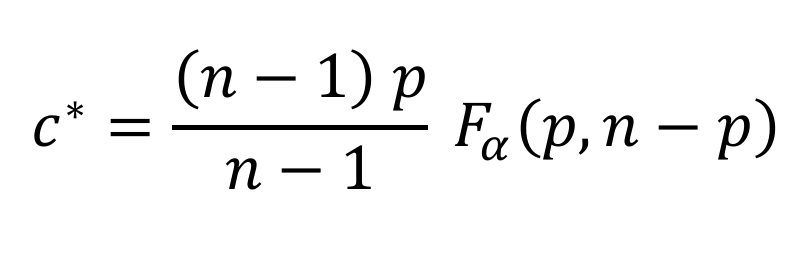

In [ ]:
# Critical value for 95% confidence

p = 5
n = 60
alpha = 0.05

# F-critical value from the F-distribution
f_critical = stats.f.ppf(1-alpha, p , n-p)

# Calculate c*
critical_value = ((n - 1) * p) / (n - p) * f_critical

print(critical_value)

###Calculate Confidance Intervals

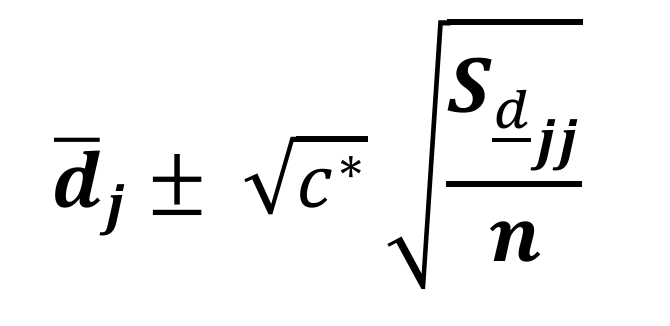

In [ ]:
# Calculate confidence intervals for each sector
confidence_intervals = {}

for sector in stocks_difference.columns:
    mean_diff = difference[sector]
    variance = cov_matrix[sector][sector]  # Variance of the differences for that sector
    ci_lower = mean_diff - np.sqrt(critical_value * (variance / n))
    ci_upper = mean_diff + np.sqrt(critical_value * (variance / n))
    confidence_intervals[sector] = (ci_lower, ci_upper)

print("Confidence Intervals:")
for sector, ci in confidence_intervals.items():
    print(f"{sector}: ({ci[0]}, {ci[1]})")

###Hotelling's T^2 Test

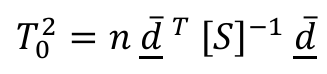

In [ ]:
# Perform t_squared-test
n = 60
t_squared = n * np.dot(np.dot(transpose_difference, cov_matrix_inv), difference)
print("Hotelling's T^2 Test Statistic:", t_squared)

#Paired Comparison Between Tables

##Prepare Data

In [ ]:
before_data = final_df[final_df['Period'] == 'Before']
before_data

In [ ]:
after_data = final_df[final_df['Period'] == 'After']
after_data

##Data Sampling

In [ ]:
sample_before = after_data.sample(n=60, random_state=42)
sample_before

In [ ]:
sample_after = after_data.sample(n=60, random_state=42)
sample_after

##Reset Indices and Select Companies

In [ ]:
sample_before = sample_before.reset_index(drop=True)
sample_after = sample_after.reset_index(drop=True)

# Get the list of company columns (all columns except 'Date' and 'Period')
companies = [col for col in sample_before.columns if col not in ['Date', 'Period']]

# Select 10 random companies
selected_companies = random.sample(companies, 10)

##Calculate Differences Between "Before" and "After" Samples



In [ ]:
differences = []

for company in selected_companies:
    differences.append(sample_after[company] - sample_before[company])

difference_df = pd.concat(differences, axis=1)

difference_df

##Visualize the Differences with a Heatmap

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(difference_df, annot=True, cmap=cmap, center=0,
            linewidths=0.5, cbar_kws={'label': 'Stock Difference'},
            linecolor='white', vmin=-1, vmax=1, annot_kws={'size': 6})

plt.title('Stock Difference (Before - After)', fontsize=14)
plt.show()

##Calculate Mean of Differences and its transpose

In [ ]:
difference_mean = difference_df.mean(axis=0)

difference_mean

In [ ]:
transpose_difference_mean = difference_mean.T

transpose_difference_mean

##Covariance Matrix and Its Inverse

In [ ]:
cov_matrix_column = difference_df.cov()

cov_matrix_column

In [ ]:
cov_matrix_inv_columns = np.linalg.inv(cov_matrix_column)

print(cov_matrix_inv_columns)

##Calculate Critical Value for Confidence Intervals

In [ ]:
# Critical value for 95% confidence
p_columns = 10
n_columns = 60
alpha = 0.05

f_critical_columns = stats.f.ppf(1-alpha, p , n-p)

critical_value_columns = ((n - 1) * p) / (n - p) * f_critical

critical_value_columns

##Calculate Confidence Intervals for Each Column

In [ ]:
confidence_intervals_columns = {}

for mean in difference_mean.index:
    mean_diff_column = difference_mean[mean]
    variance_columns = cov_matrix_column[mean][mean]
    ci_lowerr = mean_diff_column - np.sqrt(critical_value_columns * (variance_columns / n))
    ci_upperr = mean_diff_column + np.sqrt(critical_value_columns * (variance_columns / n))
    confidence_intervals_columns[mean] = (ci_lowerr, ci_upperr)

print("Confidence Intervals:")
for mean, ci in confidence_intervals_columns.items():
    print(f"{mean}: ({ci[0]}, {ci[1]})")

##Perform Hotelling's T-Squared Test

In [ ]:
n = 60
t_squared = n * np.dot(np.dot(transpose_difference_mean, cov_matrix_inv_columns), difference_mean)
print("Hotelling's T^2 Test Statistic:", t_squared)